In [23]:
import pandas as pd
import pybaseball as pb
from bs4 import BeautifulSoup
from urllib.request import urlretrieve, urlopen
import os

In [17]:
df = pd.read_csv("Splits Leaderboard Data as DH.csv")

In [18]:
df

,Season,Name,Tm,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,BABIP,wRC,wRAA,wOBA,wRC+,playerId
0,2022,Albert Pujols,STL,240,0.075000,0.187500,0.400000,0.251185,0.325000,0.483412,0.808412,0.232227,0.254777,34.736263,7.281955,0.347938,128.705874,1177
1,2022,Miguel Cabrera,DET,430,0.062791,0.230233,0.272727,0.255696,0.304651,0.318987,0.623638,0.063291,0.324324,37.850437,-11.338532,0.276554,79.482039,1744
2,2022,Carlos Santana,2 Tms,193,0.119171,0.186529,0.638889,0.178571,0.279793,0.416667,0.696459,0.238095,0.155738,20.970792,-1.107047,0.302610,99.728866,2396
3,2022,Nelson Cruz,WSN,505,0.097030,0.233663,0.415254,0.233184,0.312749,0.336323,0.649072,0.103139,0.292835,50.242638,-7.525803,0.290987,84.834982,2434
4,2022,Michael Brantley,HOU,152,0.078947,0.111842,0.705882,0.278571,0.335526,0.414286,0.749812,0.135714,0.300000,19.449104,2.061375,0.326817,114.287951,4106
5,2022,Jed Lowrie,OAK,156,0.089744,0.205128,0.437500,0.192857,0.262821,0.285714,0.548535,0.092857,0.224299,10.108278,-7.737023,0.247316,62.817904,4418
6,2022,Giancarlo Stanton,NYY,287,0.125436,0.327526,0.382979,0.188755,0.290210,0.437751,0.727961,0.248996,0.204380,34.296760,1.465983,0.316176,106.981695,4949
7,2022,Justin Turner,LAD,249,0.100402,0.188755,0.531915,0.266355,0.345382,0.373832,0.719213,0.107477,0.317647,29.939099,1.455254,0.317103,105.853114,5235
8,2022,J.D. Martinez,BOS,596,0.087248,0.243289,0.358621,0.273921,0.341176,0.448405,0.789582,0.174484,0.344828,83.917971,15.739772,0.342988,119.478456,6184
9,2022,Salvador Perez,KCR,167,0.041916,0.287425,0.145833,0.261147,0.293413,0.471338,0.764751,0.210191,0.320388,21.421649,2.318027,0.327218,110.703333,7304


In [37]:
# uncomment this if you want to dl on 
# img_urls = []
# for player in df.Name:
#     print("getting", player, "face")
#     first, last  = player.split(" ")[:2]
#     bref_id = pb.playerid_lookup(last, first, fuzzy=True)["key_bbref"].iloc[0]
#     print(bref_id)
#     bref_url = f"https://www.baseball-reference.com/players/{bref_id[0]}/{bref_id}.shtml"
#     soup = BeautifulSoup(urlopen(bref_url).read())
#     img = soup.select('#meta img')[0]["src"]
#     img_urls.append(img)
#     file_path = f"faces/{player}.jpg"
#     if not os.path.exists(file_path):
#         urlretrieve(img, file_path)
#     print("done")

In [79]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse, Polygon
def getImage(path, zoom=.4):
    return OffsetImage(plt.imread(path), zoom=zoom)


In [62]:
finalists_url = "https://twitter.com/Feinsand/status/1585645062691516428"

data_from = "https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=41&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=2&startDate=2022-03-01&endDate=2022-11-01&players=&filter=&groupBy=season&wxTemperature=&wxPressure=&wxAirDensity=&wxElevation=&wxWindSpeed=&sort=1,-1&pg=3"

In [83]:
al_finalists = [
    "Shohei Ohtani",
    "Yordan Alvarez",
    "Giancarlo Stanton",
    "George Springer",
    "Adolis Garcia"
]

nl_finalists =[
    "Josh Bell",
    "Albert Pujols",
    "Luke Voit",
    "Justin Turner",
    "Charlie Blackmon",
    "Bryce Harper"
]

## things to annotate

* Adolis Garcia only had 85 PAs as a DH but was a finalist
* Bryce Harper was a finalist but didn't qualify by one game
* circle all finalists
* put a crown on winners


In [84]:
sns.set_context("poster")
plt.xkcd()

In [85]:
df["wrc_plus"] = df["wRC+"]
df = df.sort_values("PA", ascending=False)
nl_finalists_df = df[df.Name.isin(nl_finalists)]
al_finalists_df = df[df.Name.isin(al_finalists)]

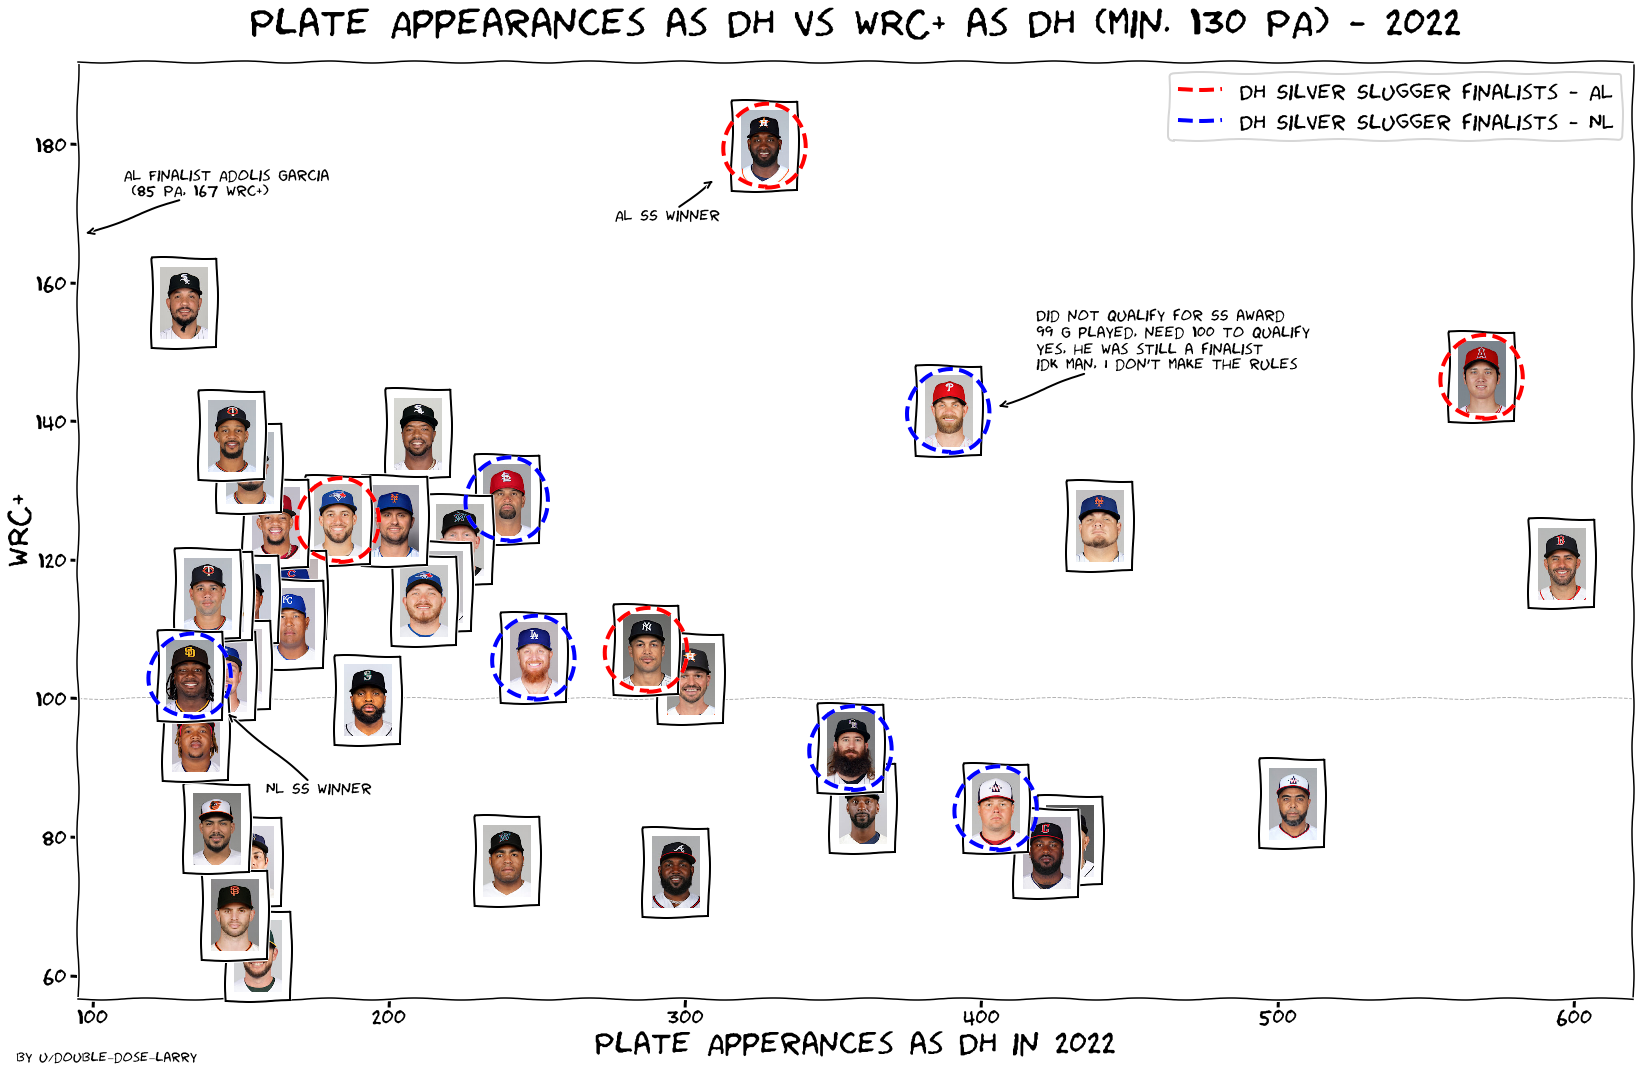

In [113]:
f, ax = plt.subplots(figsize=(23,15))

#plot faces
imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'faces/{plr.Name}.jpg'),
                      (plr.PA, plr.wrc_plus),
                       frameon=True
                      )
    )
    for plr in df.itertuples()
]



x = df["PA"]
y = df["wrc_plus"]

ax.axhline(100, ls='--', lw='1', c="k", alpha=0.3, zorder=0, label="100 wRC+")

ax.scatter(x, y)


# annotate NL finalists
nl_circles = [
    ax.add_patch(
        Ellipse(xy=(plr.PA, plr.wrc_plus), 
        width=28, 
        height=12, 
        fill=False, 
        ls="--", 
        lw=4, 
        color="b", 
        zorder=99))
    for plr in nl_finalists_df.itertuples()
]

# annotate AL finalists
al_circles = [
    ax.add_patch(Ellipse(xy=(plr.PA, plr.wrc_plus), 
                     width=28, 
                     height=12, 
                     fill=False, 
                     ls="--", 
                     lw=4, 
                     color="r", 
                     zorder=99))
    for plr in al_finalists_df.itertuples()
                 ]

# annotate winners

ax.annotate(
    "AL SS winner",
    (310,175),
    size=16,
    xytext = (-100, -40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

ax.annotate(
    "NL SS winner",
    (145,98),
    size=16,
    zorder = 100,
    xytext = (40, -80),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Adolis
ax.annotate(
    "AL Finalist Adolis Garcia\n (85 PA, 167 wrc+)",
    (97,167),
    size=16,
    zorder = 100,
    xytext = (40, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate Bryce
ax.annotate(
    "Did not qualify for SS award\n99 G played, need 100 to qualify\nyes, he was still a finalist\nidk man, I don't make the rules",
    (405,142),
    size=16,
    zorder = 100,
    xytext = (40, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


# # axis labels and stuff
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
# ax.yaxis.set_major_formatter(numerize_formatter)
# ax.xaxis.set_major_formatter(numerize_formatter)
plt.ylabel("wRC+", size=32)
plt.xlabel("Plate Apperances as DH in 2022", size=32)
plt.legend([Line2D([0],[0], color="r", lw=4, ls="--"),Line2D([0],[0], color="b", lw=4, ls="--")], ['DH Silver Slugger finalists - AL', 'DH Silver Slugger finalists - NL'])
# rest of the plot
# plt.legend(loc="lower right", prop={'size': 18})
plt.title("Plate Appearances as DH vs wRC+ as DH (min. 130 PA) - 2022", size=40, pad=30)
plt.tight_layout()
plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
plt.savefig("dh_silver_slugger_2022.png")